In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import cPickle as pickle
import time
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from engine.simulator import FleetSimulator
import experiment as ex
plt.style.use('ggplot')
from engine.dqn_classic import Agent

Using TensorFlow backend.


In [2]:
GRAPH_PATH = 'data/pickle/nyc_network_graph.pkl'
TRIP_PATH = 'data/nyc_taxi/trips_2016-05.csv'
ETA_MODEL_PATH = 'data/pickle/triptime_predictor.pkl'
GEOHASH_TABLE_PATH = 'data/table/zones.csv'
SCORE_PATH = 'data/results/'

SAMPLE_SIZE = 500000
NUM_FLEETS = 8000
NO_OP_STEPS = 15
CYCLE = 1
ACTION_UPDATE_CYCLE = 10

In [3]:
with open(GRAPH_PATH, 'r') as f:
    G = pickle.load(f)
    
with open(ETA_MODEL_PATH, 'r') as f:
    eta_model = pickle.load(f)

geohash_table = pd.read_csv(GEOHASH_TABLE_PATH, index_col='geohash')

In [4]:
def plot(result, width=15):
    df = pd.DataFrame(columns=result.columns)
    for i in range(len(result)/width-1):
        df.loc[i] = result.iloc[i*width:(i+1)*width].sum()
    plt.figure(figsize=(10, 6))
    index = df.index * width / 60.0
    plt.subplot(211)
    plt.ylabel('count')
    plt.plot(index, df.requests/10, label='demand/10')
    plt.plot(index, df.reject, label='reject')
    plt.plot(index, df.resource/10/width, label='resource/10')
    plt.legend()
    plt.subplot(212)
    plt.ylabel('wait/idle time')
    plt.plot(index, df.wait_time/(df.requests-df.reject), label='wait')
    plt.plot(index, df.idle_trip/NUM_FLEETS, label='idle')
    plt.legend()
    return plt

In [5]:
env = FleetSimulator(G, eta_model, CYCLE, ACTION_UPDATE_CYCLE)
agent = Agent(geohash_table, CYCLE, ACTION_UPDATE_CYCLE, training=False, load_netword=True)
trips, dayofweek, minofday, duration = ex.load_trips(TRIP_PATH, SAMPLE_SIZE)
num_steps = 1440 / CYCLE

AttributeError: 'module' object has no attribute 'pack'

In [11]:
env.reset(NUM_FLEETS, trips, dayofweek, minofday)

for _ in range(NO_OP_STEPS):
    _, requests, _, _, _ = env.step()
agent.reset(requests, env.dayofweek, env.minofday)
score = ex.run(env, agent, num_steps, average_cycle=60)
ex.describe(score)

t = 60 (114 elapsed) // REQ: 26430 / REJ: 1266 / AWT: 3.8 / DSP: 0.71 / RWD: 65.6
t = 120 (265 elapsed) // REQ: 23090 / REJ: 1317 / AWT: 5.4 / DSP: 0.90 / RWD: 36.2
t = 180 (466 elapsed) // REQ: 18750 / REJ: 92 / AWT: 4.8 / DSP: 0.99 / RWD: 28.9
t = 240 (669 elapsed) // REQ: 14495 / REJ: 0 / AWT: 3.9 / DSP: 0.78 / RWD: 22.9
t = 300 (855 elapsed) // REQ: 7418 / REJ: 1 / AWT: 3.0 / DSP: 0.36 / RWD: 12.3
t = 360 (1050 elapsed) // REQ: 3905 / REJ: 0 / AWT: 2.9 / DSP: 0.26 / RWD: 6.2
t = 420 (1277 elapsed) // REQ: 4701 / REJ: 0 / AWT: 2.7 / DSP: 0.75 / RWD: 4.0
t = 480 (1482 elapsed) // REQ: 6594 / REJ: 180 / AWT: 2.1 / DSP: 0.51 / RWD: 9.5
t = 540 (1707 elapsed) // REQ: 9905 / REJ: 9 / AWT: 2.4 / DSP: 0.75 / RWD: 14.9
t = 600 (1910 elapsed) // REQ: 14705 / REJ: 55 / AWT: 3.4 / DSP: 0.86 / RWD: 23.1
t = 660 (2994 elapsed) // REQ: 19635 / REJ: 69 / AWT: 2.7 / DSP: 0.62 / RWD: 34.3
t = 720 (3120 elapsed) // REQ: 22605 / REJ: 109 / AWT: 2.7 / DSP: 0.52 / RWD: 42.0
t = 780 (3262 elapsed) // REQ

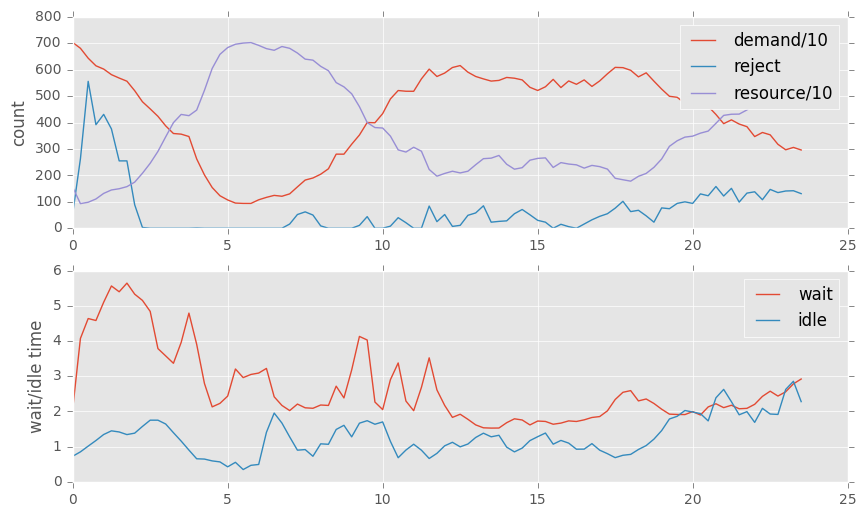

In [20]:
plot(score);